In [24]:
import numpy as np

x=np.load("variables/x.npy")
y=np.load("variables/y.npy")
x_train=np.load("variables/x_train.npy")
x_test=np.load("variables/x_test.npy")
y_test=np.load("variables/y_test.npy")
y_train=np.load("variables/y_train.npy")

### Perceptron

In [25]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(tol=1e-3, random_state=42)
perceptron.fit(x_train,y_train)

Perceptron(random_state=42)

In [26]:
perceptron.score(x_train,y_train)

0.8194444444444444

### VALIDATION CROISÉE :

In [27]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
perceptron_scores = cross_val_score(perceptron, x, 
                                      y, cv=10, scoring="f1")
display_scores(perceptron_scores)

Scores: [0.34482759 0.20833333 0.31724138 0.25165563 0.32432432 0.29411765
 0.22754491 0.30434783 0.38674033 0.38095238]
Mean: 0.30400853480834866
Standard deviation: 0.05732202164609077


### GridSearchCV
Afin de trouver les meilleurs paramètres, nous allons utiliser la méthode d'optimisation GridSearchCV.

In [28]:
from sklearn.model_selection import GridSearchCV

perceptron_param_grid = {'penalty' : ['l1', 'l2', 'elasticnet'],
    'fit_intercept': [True, False],
    'max_iter': [500, 1000, 1500, 2000]
    }

grid_search = GridSearchCV(perceptron, perceptron_param_grid, cv=7,
                           scoring='f1', return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=Perceptron(random_state=42),
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [500, 1000, 1500, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='f1')

In [29]:
grid_search.best_params_

{'fit_intercept': True, 'max_iter': 500, 'penalty': 'elasticnet'}

In [30]:
best_perceptron = grid_search.best_estimator_

In [31]:
best_perceptron_score = cross_val_score(best_perceptron, x_train, 
                                          y_train, cv=7, scoring="f1")

display_scores(best_perceptron_score)

Scores: [0.42937853 0.36363636 0.37864078 0.4        0.3373494  0.408
 0.45945946]
Mean: 0.3966377897798086
Standard deviation: 0.03796054842331022


 ### Matrice de Confusion
 
Nous allons maintenant utiliser afin d'étudier les performances de notre système de classification supervisé. Calculons maintenant cette matrice avec notre modèle amélioré.

In [32]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(perceptron, x_train, y_train, cv=3)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[2659,  297],
       [ 397,  175]], dtype=int64)

In [34]:
y_train_perfect_predictions = y_train
confusion_matrix(y_train, y_train_perfect_predictions)

array([[2956,    0],
       [   0,  572]], dtype=int64)

### Recall et precision en fonction du seuil
Affichons les valeurs du recall et de la précision en fonction du seuil ainsi que la valeur de la précision en fonction du recall

In [35]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.3707627118644068

In [36]:
recall_score(y_train, y_train_pred)

0.30594405594405594

In [37]:
y_scores = cross_val_predict(perceptron, x_train, y_train, cv=3,
                             method="decision_function")

In [38]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

NameError: name 'save_fig' is not defined

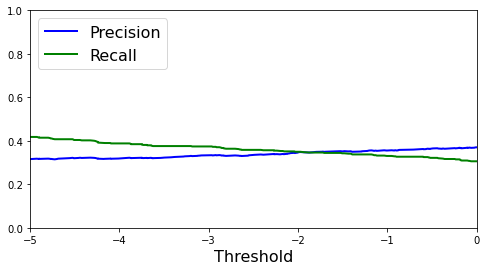

In [39]:
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-5, 0])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

### Courbe ROC
Affichons la courbe roc afin de confronter notre taux de vrai positif par rapport au taux de faux positif. plus la courbe se rapproche du coin supérieur gauche, plus notre taux de vrai positif est idéal, et on évite un maximum de faux positif. On utilise l'air sous la courbe ROC afin de comparer nos modèles, qui doit être le plus proche de 1.

In [ ]:
from sklearn.metrics import roc_curve

fpr_perceptron, tpr_perceptron, thresholds = roc_curve(y_train, y_scores)

In [ ]:
def plot_roc_curve(fpr_perceptron, tpr_perceptron, label=None):
    plt.plot(fpr_perceptron, tpr_perceptron, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_perceptron, tpr_perceptron)

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_train, y_scores) 

In [41]:
np.save('variables/fpr_perceptron.npy', fpr_perceptron)
np.save('variables/tpr_perceptron.npy', tpr_perceptron)